Build a regression model.

In [1]:
# imports
import statsmodels.api as sm
import pandas as pd
import numpy as np
import scipy

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
full_df = pd.read_csv('../data/bike_stations_barcelona_full_poi.csv', index_col=0)

grouped_by_station = full_df[['station_id', 'empty_slots','free_bikes','review_count', 'rating', 'price']].groupby(by='station_id').mean()

grouped_by_station.head()

C:\Users\gurmo\AppData\Local\Temp\ipykernel_3712\2885986358.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_by_station = full_df[['station_id', 'empty_slots','free_bikes','review_count', 'rating', 'price']].groupby(by='station_id').mean()


,empty_slots,free_bikes,review_count,rating
station_id,,,,
00028670e3d01438515caba403ffd680,12.0,8.0,18.800000,4.000000
00341b8b54545c560fdec7d7983f9f5a,25.0,14.0,NaN,NaN
00565dda9629be93f8f69358b48602cc,8.0,17.0,383.125000,4.062500
006395fd7434c1f65d20cf0a1b0c94f0,15.0,8.0,NaN,NaN
00e4814116fc414fb00b93cc1c9aa1ca,18.0,9.0,9.555556,4.277778


In [3]:
grouped_by_station.info()

<class 'pandas.core.frame.DataFrame'>
Index: 505 entries, 00028670e3d01438515caba403ffd680 to ffbaa273abd20a25367fc85ccfd7330c
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   empty_slots   505 non-null    float64
 1   free_bikes    505 non-null    float64
 2   review_count  145 non-null    float64
 3   rating        145 non-null    float64
dtypes: float64(4)
memory usage: 19.7+ KB


In [4]:
# filling with 0 the two bike stations without any poi
grouped_by_station[['review_count', 'rating']] = grouped_by_station[['review_count', 'rating']].fillna(0)

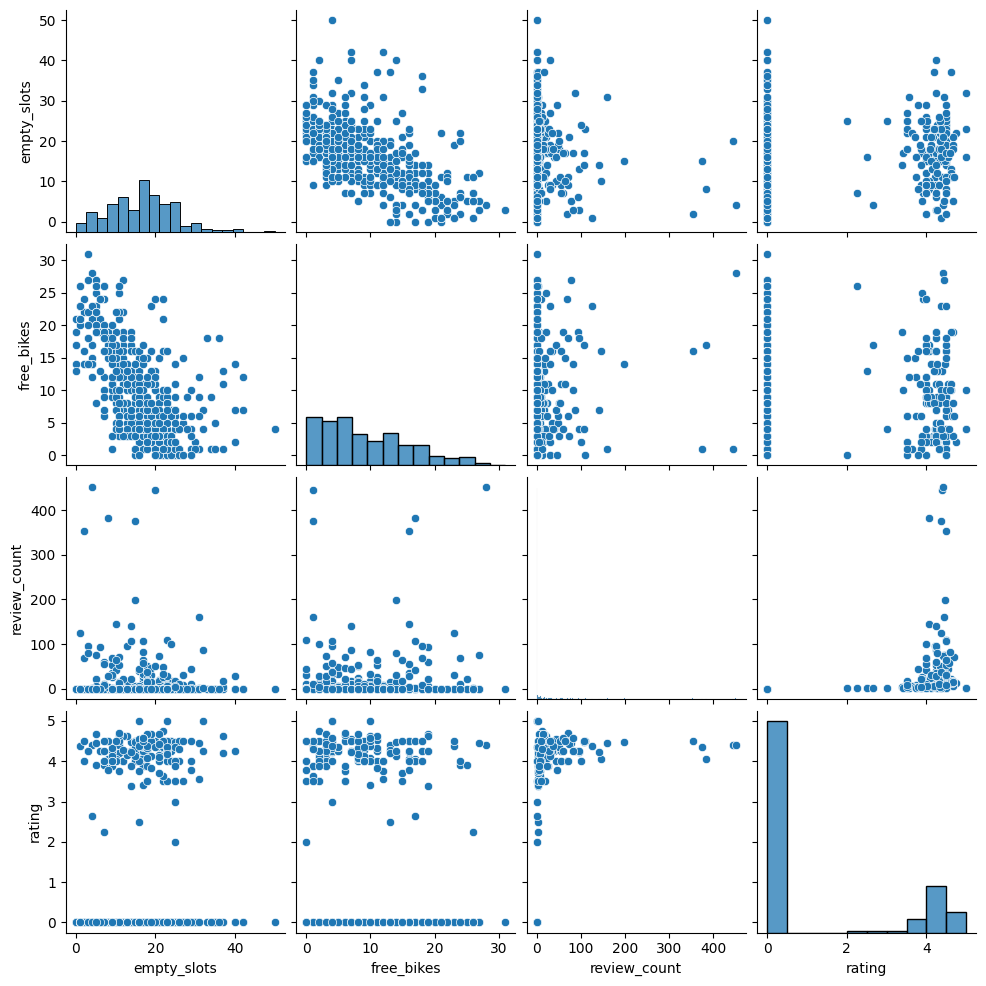

In [5]:
sns.pairplot(data=grouped_by_station)
plt.show()

Provide model output and an interpretation of the results. 

In [6]:
y = grouped_by_station['free_bikes']
X = grouped_by_station[['review_count', 'rating', 'price']]
X = sm.add_constant(X) #adds a column of 1's so the model will contain an intercept
X.head()

KeyError: "['price'] not in index"

In [ ]:
model = sm.OLS(y, X) #instantiate
results = model.fit() #fit the model (this is where OLS is actually being run)
print(results.summary())

# Stretch

How can you turn the regression model into a classification model?